Step 1: Recommended Kaggle Datasets

Linear Regression Dataset (Regression Task): Dataset: House Prices – Advanced Regression Techniques

Logistic Regression Datasets (Classification Tasks):

Binomial Classification (Binary Classification): Dataset: Titanic – Machine Learning from Disaster
Ordinal Classification (Ordered categories): Dataset: Student Performance Data Set
Predicting Grade (A, B, C, D) based on performance features.

Multinomial Classification (Multiple unordered categories): Dataset: Iris Species Classification

Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

Data Preprocessing (For All Datasets)

In [ ]:
def preprocess_data(df, target_column, categorical_cols=None, drop_cols=None):
    if drop_cols:
        df = df.drop(columns=drop_cols)

    # Encode categorical columns
    if categorical_cols:
        for col in categorical_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])

    # Handle missing values
    df = df.fillna(df.median(numeric_only=True))

    # Features and target
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y

Linear Regression Implementation

MSE: 1604098912.9199, RMSE: 40051.2036, MAE: 25453.1640, R2: 0.7909, Adjusted R2: 0.7902


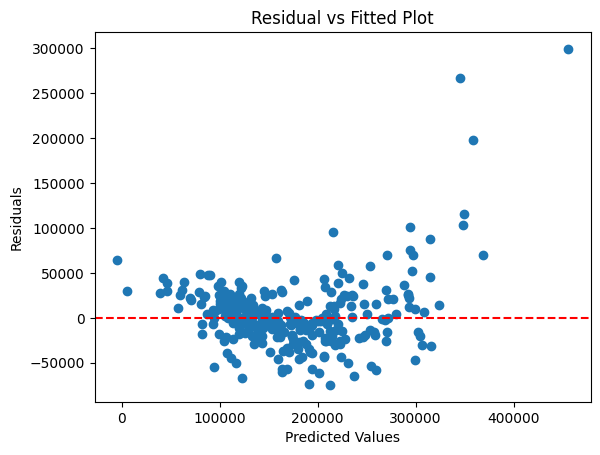

In [ ]:
# Load dataset
df_reg = pd.read_csv('house_price.csv')

# Select features and target
df_reg = df_reg[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'SalePrice']].dropna()

X_reg, y_reg = preprocess_data(df_reg, 'SalePrice')

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train model
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg.predict(X_test_reg)

# Metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
n = X_reg.shape[0]
p = X_reg.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}, Adjusted R2: {adjusted_r2:.4f}")

# Residual Plot
residuals = y_test_reg - y_pred_reg
plt.scatter(y_pred_reg, residuals)
plt.axhline(0, linestyle='--', color='r')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual vs Fitted Plot')
plt.show()

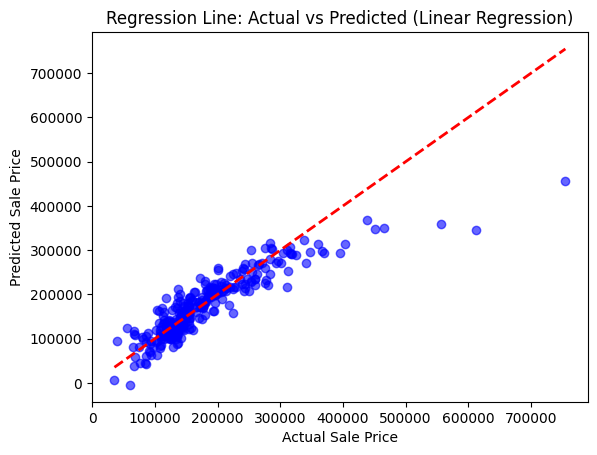

In [ ]:
# Plotting Regression Line vs Actual Data
# Since we have multiple features, let's plot the predicted vs actual SalePrice
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         linestyle='--', color='red', linewidth=2)

plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Regression Line: Actual vs Predicted (Linear Regression)')
plt.show()

Logistic Regression Implementation

1. Binary Classification – Titanic Dataset

Binary Logistic Regression: Accuracy=0.7989, Precision=0.7794, Recall=0.7162, F1=0.7465


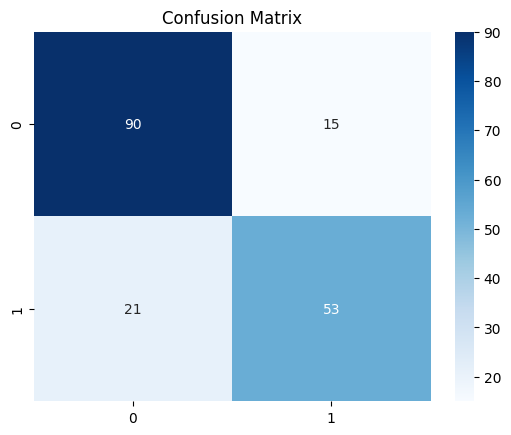

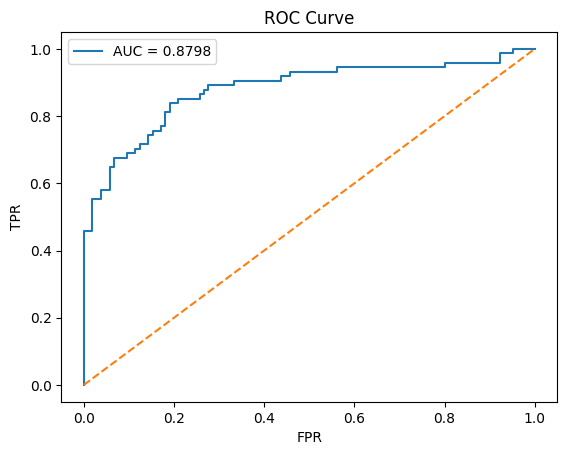

In [ ]:
df_bin = pd.read_csv('titanic.csv')
df_bin = df_bin[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

X_bin, y_bin = preprocess_data(df_bin, 'Survived', categorical_cols=['Sex'])

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)

log_bin = LogisticRegression(max_iter=200)
log_bin.fit(X_train_bin, y_train_bin)
y_pred_bin = log_bin.predict(X_test_bin)

# Metrics
accuracy_bin = accuracy_score(y_test_bin, y_pred_bin)
precision_bin = precision_score(y_test_bin, y_pred_bin)
recall_bin = recall_score(y_test_bin, y_pred_bin)
f1_bin = f1_score(y_test_bin, y_pred_bin)
cm_bin = confusion_matrix(y_test_bin, y_pred_bin)

print(f"Binary Logistic Regression: Accuracy={accuracy_bin:.4f}, Precision={precision_bin:.4f}, Recall={recall_bin:.4f}, F1={f1_bin:.4f}")

sns.heatmap(cm_bin, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

fpr, tpr, _ = roc_curve(y_test_bin, log_bin.predict_proba(X_test_bin)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC Curve')
plt.show()

2. Ordinal Classification – Student Performance Dataset

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Ordinal Logistic Regression Accuracy: 0.9650


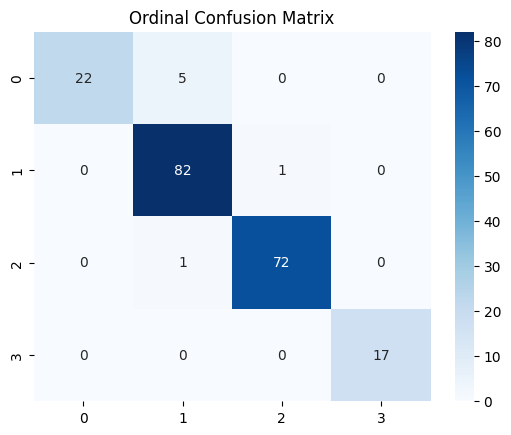

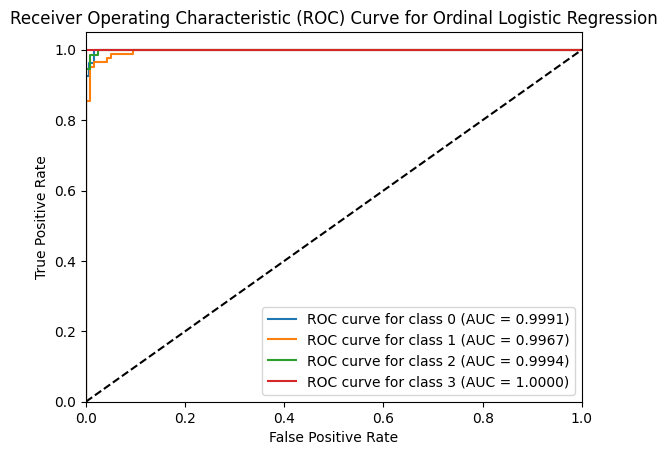

In [ ]:
df_ord = pd.read_csv('StudentsPerformance.csv')

# Generate an ordinal target: map grades to numerical classes (A=3, B=2, C=1, D=0)
def get_grade(row):
    avg_score = (row['math score'] + row['reading score'] + row['writing score']) / 3
    if avg_score >= 85: return 3
    elif avg_score >= 70: return 2
    elif avg_score >= 50: return 1
    else: return 0

df_ord['Grade'] = df_ord.apply(get_grade, axis=1)

X_ord, y_ord = preprocess_data(df_ord, 'Grade', categorical_cols=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])

X_train_ord, X_test_ord, y_train_ord, y_test_ord = train_test_split(X_ord, y_ord, test_size=0.2, random_state=42)

log_ord = LogisticRegression(multi_class='multinomial', max_iter=200)
log_ord.fit(X_train_ord, y_train_ord)
y_pred_ord = log_ord.predict(X_test_ord)

accuracy_ord = accuracy_score(y_test_ord, y_pred_ord)
print(f"Ordinal Logistic Regression Accuracy: {accuracy_ord:.4f}")

cm_ord = confusion_matrix(y_test_ord, y_pred_ord)
sns.heatmap(cm_ord, annot=True, fmt='d', cmap='Blues')
plt.title('Ordinal Confusion Matrix')
plt.show()

# ROC Curve for Ordinal Logistic Regression (One-vs-Rest)
y_prob_ord = log_ord.predict_proba(X_test_ord)
classes = np.unique(y_ord)

plt.figure()
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_ord, y_prob_ord[:, i], pos_label=classes[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve for class {classes[i]} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Ordinal Logistic Regression')
plt.legend(loc="lower right")
plt.show()

3. Multinomial Classification – Iris Dataset

Multinomial Logistic Regression Accuracy: 1.0000


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


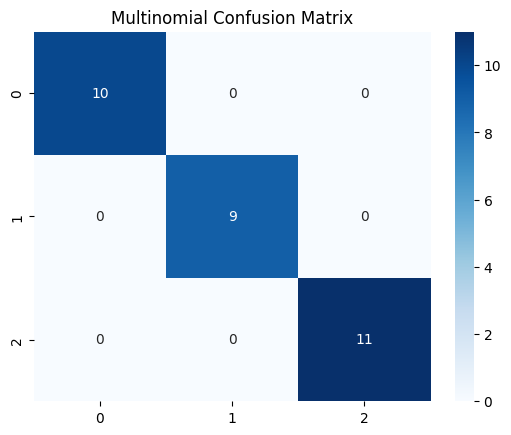

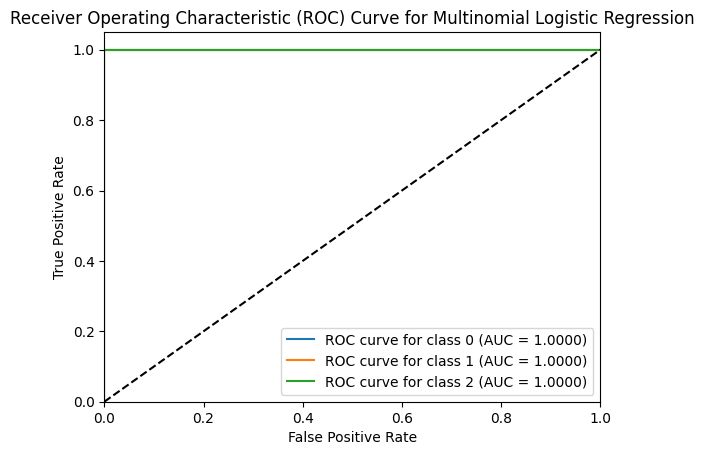

In [ ]:
df_multi = pd.read_csv('Iris.csv')  # Columns: sepal_length, sepal_width, petal_length, petal_width, species

# Select a subset of features
df_multi = df_multi[['PetalLengthCm', 'PetalWidthCm', 'Species']]

X_multi, y_multi = preprocess_data(df_multi, 'Species', categorical_cols=['Species'])

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

log_multi = LogisticRegression(multi_class='multinomial', max_iter=200, C=0.1) # Added regularization with C=0.1
log_multi.fit(X_train_multi, y_train_multi)
y_pred_multi = log_multi.predict(X_test_multi)

accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)
print(f"Multinomial Logistic Regression Accuracy: {accuracy_multi:.4f}")

cm_multi = confusion_matrix(y_test_multi, y_pred_multi)
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues')
plt.title('Multinomial Confusion Matrix')
plt.show()

# ROC Curve for Multinomial Logistic Regression (One-vs-Rest)
y_prob_multi = log_multi.predict_proba(X_test_multi)
classes = np.unique(y_multi)

plt.figure()
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_multi, y_prob_multi[:, i], pos_label=classes[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve for class {classes[i]} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multinomial Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Cross-validation for Multinomial Logistic Regression
kf_multi = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_multi = cross_val_score(log_multi, X_multi, y_multi, cv=kf_multi, scoring='accuracy')
print(f"Multinomial Classification CV Mean Accuracy: {cv_scores_multi.mean():.4f}")

Multinomial Classification CV Mean Accuracy: 0.9533


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Step 4: Cross-Validation (Example)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_bin, X_bin, y_bin, cv=kf, scoring='accuracy')
print(f"Binary Classification CV Mean Accuracy: {cv_scores.mean():.4f}")

Binary Classification CV Mean Accuracy: 0.7901


Step 5: Effect of Hyperparameters (Learning Rate & Iterations)

In [ ]:
# Example: Fewer Iterations
log_low_iter = LogisticRegression(max_iter=50)
log_low_iter.fit(X_train_bin, y_train_bin)
acc_low_iter = accuracy_score(y_test_bin, log_low_iter.predict(X_test_bin))
print(f"Accuracy with max_iter=50: {acc_low_iter:.4f}")

# Example: Solver changes
log_solver = LogisticRegression(max_iter=200, solver='liblinear')
log_solver.fit(X_train_bin, y_train_bin)
acc_solver = accuracy_score(y_test_bin, log_solver.predict(X_test_bin))
print(f"Accuracy with liblinear solver: {acc_solver:.4f}")

Accuracy with max_iter=50: 0.7989
Accuracy with liblinear solver: 0.7989
